In [3]:
import pandas as pd
import statistics as st

In [5]:
student=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
student

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [17]:
# task1
Mean = []
Median = []
Mode = []
for i in student:
    Mean.append(student.loc[:, i].mean())
    Median.append(student.loc[:, i].median())
    Mode.append(st.mode(student[i]))

data = pd.DataFrame([Mean, Median, Mode], columns=['Statistics', 'Python', 'Tableau'])
data.insert(0, 'Measures', ['Mean', 'Median', 'Mode'])
data

    

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


In [19]:
# task2
import pandas as pd

# Initialize lists for mean, standard deviation, and coefficient of variation
mean = []
std = []
cv = []

# Calculate metrics for each subject
for i in student:
    Mean_col = student.loc[:, i].mean()
    mean.append(Mean_col)
    Std_col = student.loc[:, i].std()
    std.append(Std_col)
    cv_value = Std_col / Mean_col * 100
    cv.append(cv_value)

# Create DataFrame to store results
data1 = pd.DataFrame([mean, std, cv], columns=['Statistics', 'Python', 'Tableau'])
data1.insert(0, 'Measures', ['Mean', 'Standard Deviation', 'Coefficient of Variation'])

# Identify best-performing subject based on coefficient of variation
best_subject_index = cv.index(min(cv))
best_subject = data1.columns[best_subject_index + 1]  # Offset by 1 due to 'Measures' column

# Display DataFrame and interpretation
print(f"The subject with the lowest coefficient of variation, indicating the most consistent performance, is: {best_subject}.")
print("A lower coefficient of variation suggests less variation in scores relative to the mean, meaning scores are more consistent.")
data1




The subject with the lowest coefficient of variation, indicating the most consistent performance, is: Python.
A lower coefficient of variation suggests less variation in scores relative to the mean, meaning scores are more consistent.


,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Standard Deviation,7.236126,4.345484,7.320899
2,Coefficient of Variation,11.883931,5.309731,10.762862


In [21]:
# task3
from scipy.stats import skew

# Outlier detection and skewness measurement
results = []
for i in student:
    LO = []  # List for storing lower outliers
    UO = []  # List for storing upper outliers
    col_series = pd.Series(student[i])

    Max = max(col_series)
    Min = min(col_series)
    range = Max - Min

    # Calculating first and third quartiles
    Q1 = col_series.quantile(0.25)
    Q3 = col_series.quantile(0.75)
    IQR = Q3 - Q1

    # Calculating lower and upper fences for outliers
    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    # Identifying outliers
    for z in col_series:
        if z < LF:
            LO.append(z)  # Lower outlier
        if z > UF:
            UO.append(z)  # Upper outlier

    # Calculate skewness
    skewness_value = skew(col_series)

    # Store results
    results.append((i, Min, Max, range, Q1, Q3, IQR, UF, LF, skewness_value, [LO, UO]))

# Create DataFrame to display results
outliers = pd.DataFrame(results, columns=['Subject', 'Min', 'Max', 'Range', 'Q1', 'Q3', 'IQR', 'UF', 'LF', 'Skewness', 'Outliers'])
outliers


,Subject,Min,Max,Range,Q1,Q3,IQR,UF,LF,Skewness,Outliers
0,Statistics,50,74,24,54.0,67.00,13.00,86.500,34.500,0.202446,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,98.000,66.000,0.120964,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,87.125,50.125,-0.995360,"[[45, 50, 50, 50, 46, 46], []]"


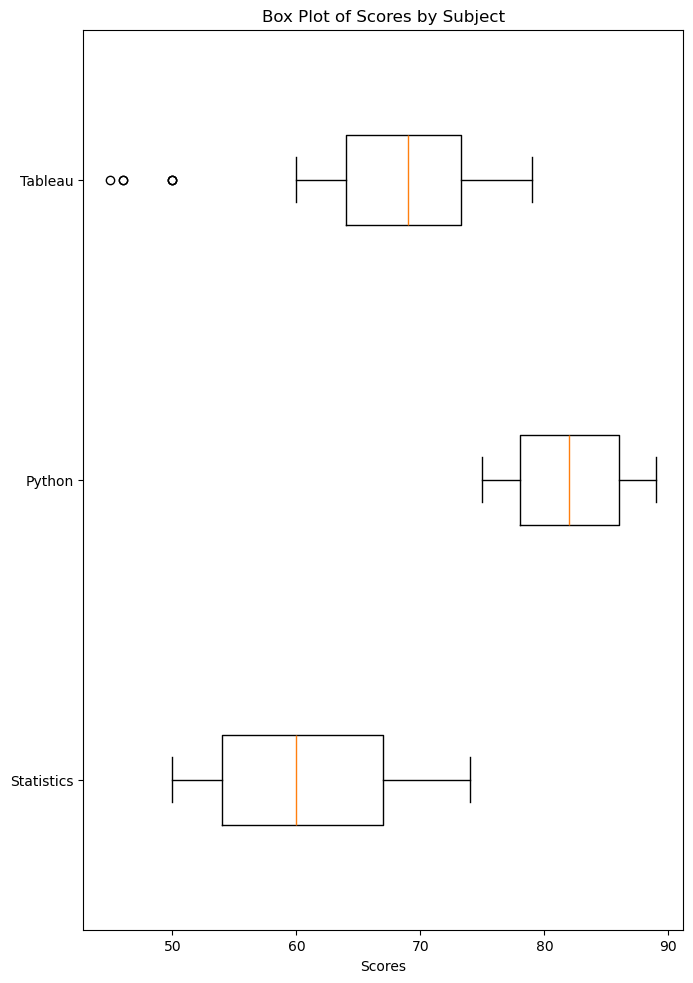

In [13]:
# task4
import matplotlib.pyplot as plt

# Prepare data for boxplot
Statistics_data = student['Statistics'].tolist()
Python_data = student['Python'].tolist()
Tableau_data = student['Tableau'].tolist()

# Plotting the boxplot
fig = plt.figure(figsize=(6, 9))
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot([Statistics_data, Python_data, Tableau_data], vert=0)

# Setting labels and title for clarity
ax.set_yticklabels(['Statistics', 'Python', 'Tableau'])
ax.set_xlabel('Scores')
ax.set_title('Box Plot of Scores by Subject')
plt.show()


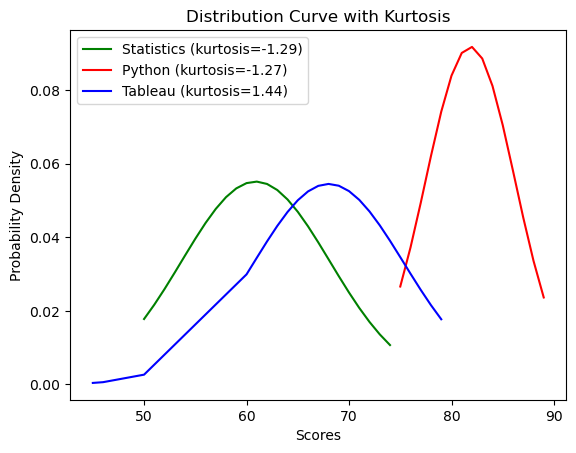

In [15]:
# task5
import statistics as st
from scipy.stats import norm, kurtosis

# Sort data and calculate means and standard deviations
Statistics_data = sorted(Statistics_data)
Python_data = sorted(Python_data)
Tableau_data = sorted(Tableau_data)

S_mean = st.mean(Statistics_data)
S_std = st.stdev(Statistics_data)
P_mean = st.mean(Python_data)
P_std = st.stdev(Python_data)
T_mean = st.mean(Tableau_data)
T_std = st.stdev(Tableau_data)

# Calculating kurtosis for each dataset
S_kurtosis = kurtosis(Statistics_data)
P_kurtosis = kurtosis(Python_data)
T_kurtosis = kurtosis(Tableau_data)

# Plotting the distribution curves
plt.title('Distribution Curve with Kurtosis')
plt.plot(Statistics_data, norm.pdf(Statistics_data, S_mean, S_std), color='green', label=f'Statistics (kurtosis={S_kurtosis:.2f})')
plt.plot(Python_data, norm.pdf(Python_data, P_mean, P_std), color='red', label=f'Python (kurtosis={P_kurtosis:.2f})')
plt.plot(Tableau_data, norm.pdf(Tableau_data, T_mean, T_std), color='blue', label=f'Tableau (kurtosis={T_kurtosis:.2f})')

plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
